CNN for Clothes Classification (Fashion MNIST)

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255.0
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [21]:
#Split the data into training and validation sets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [22]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7300 - loss: 0.7420 - val_accuracy: 0.8684 - val_loss: 0.3644
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8613 - loss: 0.3812 - val_accuracy: 0.8882 - val_loss: 0.3126
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8784 - loss: 0.3285 - val_accuracy: 0.8943 - val_loss: 0.2890
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8907 - loss: 0.2947 - val_accuracy: 0.8898 - val_loss: 0.2890
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9028 - loss: 0.2687 - val_accuracy: 0.9031 - val_loss: 0.2633
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9023 - loss: 0.2603 - val_accuracy: 0.9030 - val_loss: 0.2672
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9075 - loss: 0.2460 - val_accuracy: 0.9050 - val_loss: 0.2599
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9122 - loss: 0

In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9047 - loss: 0.2647
Test accuracy: 0.9059000015258789
Test loss: 0.2575741112232208


In [31]:
if y_test.ndim == 2:  # i.e., one-hot encoded
    y_test = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


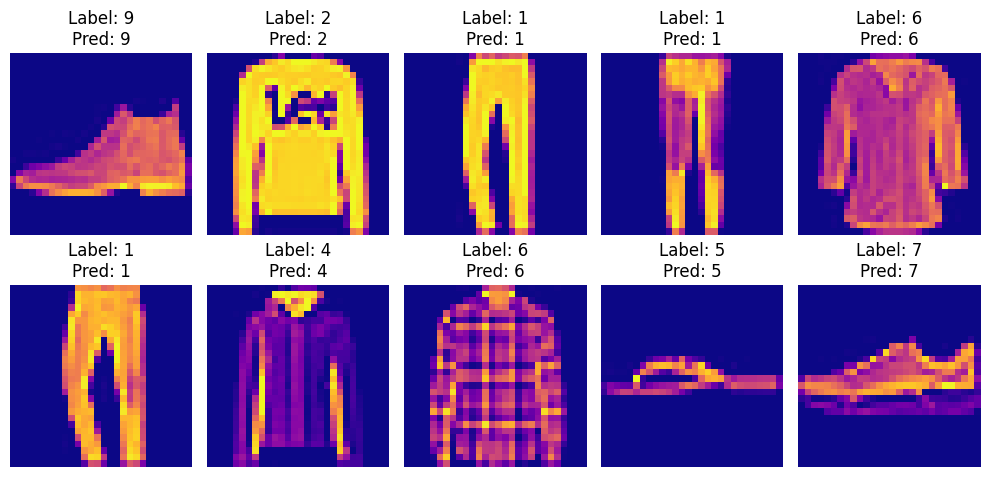

In [33]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='plasma')
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
#Save entire model
model.save('my_model.h5')

In [36]:
#Save model architecture and weights separately
with open('model.json','w') as f:
    f.write(model.to_json())  

In [38]:
model.save_weights('model_weights.weights.h5')